<a href="https://colab.research.google.com/github/introvet7/CHMP/blob/main/%D0%9A%D0%B8%D1%8F%D1%88%D0%BA%D0%BE_%D0%86%D0%BB%D0%BB%D1%8F_%D0%A7%D0%9C_%D0%A4%D1%96%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D0%9F%D1%80%D0%BE%D1%94%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Фінальний проект
з дисципліни "Чисельні Методи Програмування"

студента ФІТ 2-8
#Кияшко Ілля Олегович


**#Метод Сімпсона**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      X      Y
0  -4.7  4.100
1  -4.5  6.000
2  -4.3  6.800
3  -4.1  6.900
4  -3.9  6.900
5  -3.7  6.900
6  -3.5  5.400
7  -3.3  5.100
8  -3.1  4.850
9  -2.9  4.700
10 -2.7  4.600
11 -2.5  4.530
12 -2.3  4.470
13 -2.1  4.380
14 -1.9  4.250
15 -1.7  4.240
16 -1.5  4.235
17 -1.3  4.250
18 -1.1  4.110
19 -0.9  4.230
20 -0.7  4.330
21 -0.5  4.250
22 -0.3  4.270
23 -0.1  4.400


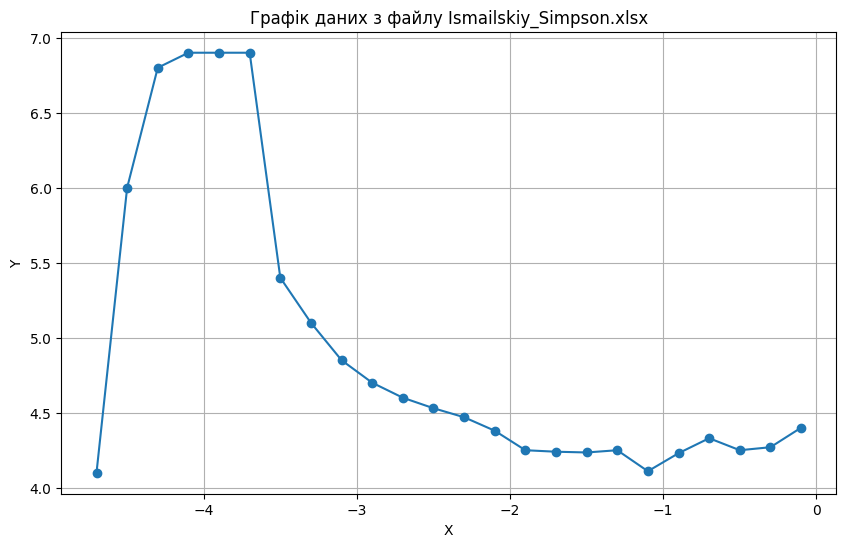

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Монтуємо Google Drive
drive.mount('/content/drive')

# Читаємо Excel файл
file_path = '/content/drive/My Drive/Ismailskiy_Simpson.xlsx'
df = pd.read_excel(file_path)

# Виводимо дані для перевірки
print(df)

# Припустимо, що у вас є стовпці 'X' та 'Y' для побудови графіка
# Якщо назви стовпців інші, змініть їх відповідно
x = df['X']
y = df['Y']

# Створюємо графік
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Графік даних з файлу Ismailskiy_Simpson.xlsx')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from scipy.integrate import simpson
# Реалізація методу Сімпсона
def Ismailskiy_Simpson(df):
    h = df['X'].iloc[1] - df['X'].iloc[0]
    s = df['Y'].iloc[0] + df['Y'].iloc[len(df)-1]
    for i in range(1, len(df)-1):
        if i % 2 == 0:
            s += 2 * df['Y'].iloc[i]
        else:
            s += 4 * df['Y'].iloc[i]
    return s * h / 3

# Результат власної функції
result_my = Ismailskiy_Simpson(df)

# Перевірка за допомогою вбудованої функції simpson
result_scipy = simpson(y=df['Y'], x=df['X'])

# Виведення результатів
print(f"Результат власної реалізації: {result_my}")
print(f"Результат за допомогою simpson: {result_scipy}")



Результат власної реалізації: 22.59000000000003
Результат за допомогою simpson: 22.87716666666667


**#Метод Трапецій №1**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Дані з Excel:
    X    Y
 7.70 3.45
 7.35 3.59
 7.00 4.59
 6.65 5.18
 6.30 5.34
 5.95 5.50
 5.60 5.70
 5.25 5.87
 4.90 6.06
 4.55 6.09
 4.20 6.22
 3.85 6.36
 3.50 6.25
 3.15 5.50
 2.80 5.36
 2.45 5.55
 2.10 5.81
 1.75 5.27
 1.40 5.08
 1.05 4.95
 0.70 4.82
 0.35 4.70
-0.00 4.42


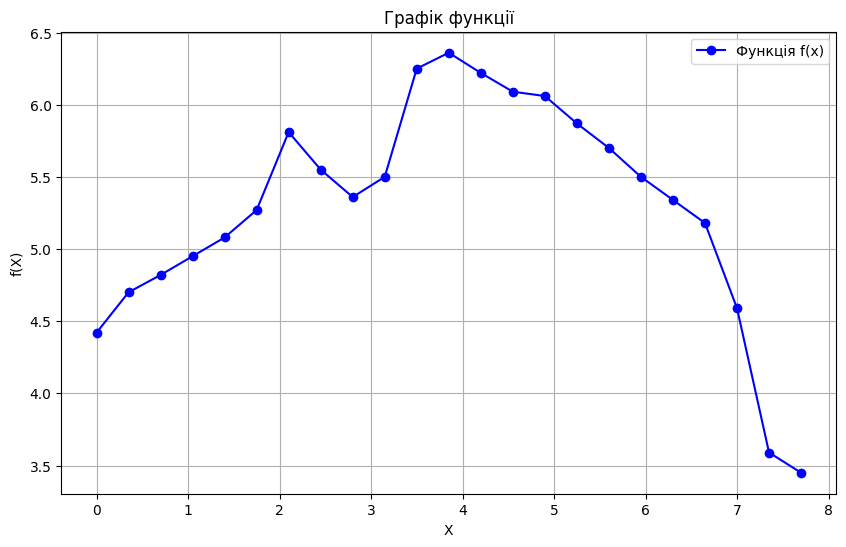

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Завантаження Google Drive
drive.mount('/content/drive')

# Шлях до файлу
file_path = '/content/drive/My Drive/Ismailskiy_Trapecia_1.xlsx'

# Читання Excel файлу
df1 = pd.read_excel(file_path)

# Виведення таблиці без наукової нотації
pd.options.display.float_format = '{:.2f}'.format  # Формат чисел
print("Дані з Excel:")
print(df1.to_string(index=False))  # Вивід таблиці без індексів

# Візуалізація графіка
plt.figure(figsize=(10, 6))
plt.plot(df1['X'], df1['Y'], marker='o', label='Функція f(x)', color='b')

# Налаштування графіка
plt.title('Графік функції')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.grid()

# Показати графік
plt.show()


In [ ]:
import pandas as pd
from scipy.integrate import trapezoid  # Зміна на trapezoid

# Читання Excel файлу з локального диска
file_path = 'Ismailskiy_Trapecia_1.xlsx'  # Шлях до файлу на вашому комп'ютері

# Реалізація методу трапецій
def Ismailskiy_Trapecia(df):
    h = df['X'].iloc[1] - df['X'].iloc[0]  # Крок
    s = (df['Y'].iloc[0] + df['Y'].iloc[-1]) / 2  # Перший і останній елементи
    for i in range(1, len(df) - 1):
        s += df['Y'].iloc[i]  # Додаємо інші значення
    return s * h  # Повертаємо результат

# Результат власної функції
result_custom = Ismailskiy_Trapecia(df1)

# Перевірка за допомогою вбудованої функції trapezoid
result_scipy = trapezoid(df1['Y'], df1['X'])  # Зміна на trapezoid

# Виведення результатів
print(f"Результат власної реалізації: {result_custom}")
print(f"Результат за допомогою trapezoid: {result_scipy}")

Результат власної реалізації: -41.20375000000006
Результат за допомогою trapezoid: -41.20375000000005


**#Метод Трапецій №2**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Дані з таблиці:
       X    Y
0  -4.50 4.02
1  -4.30 3.80
2  -4.10 3.97
3  -3.90 4.02
4  -3.70 3.92
5  -3.50 3.85
6  -3.30 3.10
7  -3.10 0.20
8  -2.90 2.26
9  -2.70 2.27
10 -2.50 2.33
11 -2.30 2.01
12 -2.10 1.67
13 -1.90 1.38
14 -1.70 1.40
15 -1.50 1.43
16 -1.30 1.45
17 -1.10 1.00
18 -0.90 1.05
19 -0.70 1.12
20 -0.50 1.18
21 -0.30 1.09
22 -0.10 0.23


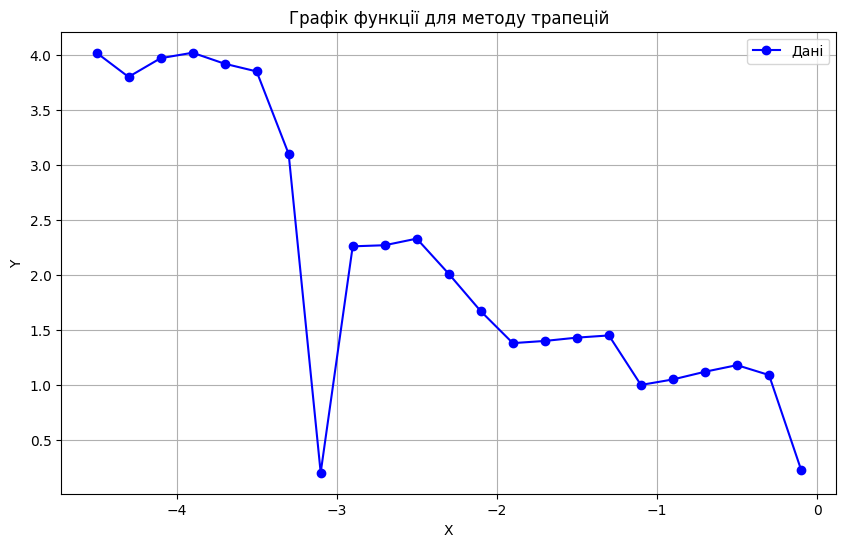

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Завантаження Google Drive
drive.mount('/content/drive')

# Шлях до файлу
file_path = '/content/drive/My Drive/Ismailskiy_Trapecia_2.xlsx'

# Читання Excel файлу
df = pd.read_excel(file_path)  # Всі дані на одному аркуші

# Виведення даних з таблиці
print("Дані з таблиці:")
print(df)

# Візуалізація даних
plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], marker='o', label='Дані', color='blue')  # Графік без заповнення
plt.title('Графік функції для методу трапецій')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from scipy.integrate import trapezoid
from google.colab import drive

# Завантаження Google Drive
drive.mount('/content/drive')

# Шлях до файлу
file_path = '/content/drive/My Drive/Ismailskiy_Trapecia_2.xlsx'

# Читання Excel файлу
df2 = pd.read_excel(file_path)  # Всі дані на одному аркуші

# Реалізація методу трапецій
def Ismailskiy_Trapecia(df):
    h = df['X'].iloc[1] - df['X'].iloc[0]  # Крок
    s = (df['Y'].iloc[0] + df['Y'].iloc[-1]) / 2  # Перший і останній елементи
    for i in range(1, len(df) - 1):
        s += df['Y'].iloc[i]  # Додаємо інші значення
    return s * h  # Повертаємо результат

# Результат власної функції
result_custom = Ismailskiy_Trapecia(df2)

# Перевірка за допомогою вбудованої функції trapezoid
result_scipy = trapezoid(df2['Y'], df2['X'])

# Виведення результатів
print(f"Результат власної реалізації: {result_custom}")
print(f"Результат за допомогою trapezoid: {result_scipy}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Результат власної реалізації: 9.32540000000001
Результат за допомогою trapezoid: 9.3254


**#Метод Прямокутників**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Дані з таблиці:
       X    Y
0   7.35 2.98
1   7.00 2.70
2   6.65 2.78
3   6.30 2.94
4   5.95 3.36
5   5.60 3.30
6   5.25 2.43
7   4.90 2.70
8   4.55 2.91
9   4.20 3.03
10  3.85 3.59
11  3.50 3.43
12  3.15 2.27
13  2.80 2.23
14  2.45 2.20
15  2.10 2.04
16  1.75 1.75
17  1.40 1.23
18  1.05 0.85
19  0.70 0.33
20  0.35 0.10
21 -0.00 0.00


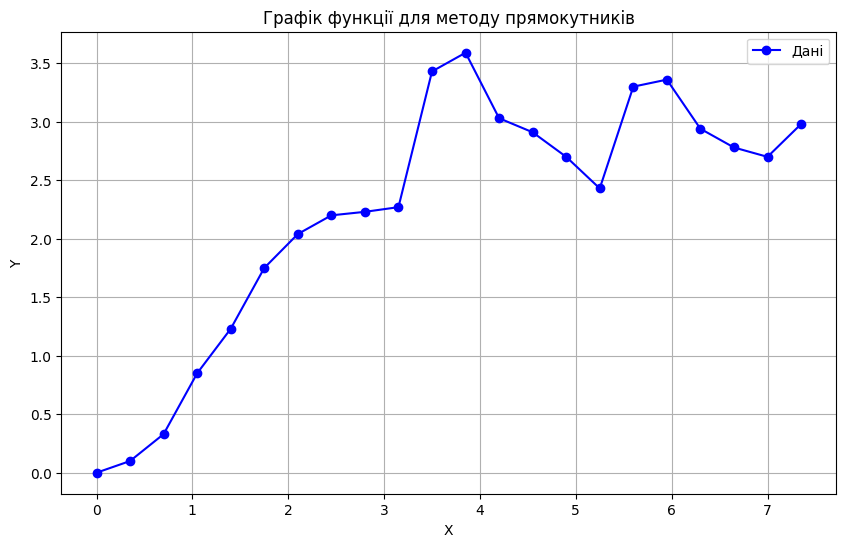

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Завантаження Google Drive
drive.mount('/content/drive')

# Шлях до файлу
file_path = '/content/drive/My Drive/Ismailskiy_Pryamokut.xlsx'

# Читання Excel файлу
df = pd.read_excel(file_path)  # Всі дані на одному аркуші

# Виведення даних з таблиці
print("Дані з таблиці:")
print(df)

# Візуалізація даних
plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], marker='o', label='Дані', color='blue')  # Графік без заповнення
plt.title('Графік функції для методу прямокутників')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Читання Excel файлу з локального диска
file_path = '/content/drive/My Drive/Ismailskiy_Pryamokut.xlsx'  # Шлях до файлу на Google Drive

# Читання Excel файлу
df = pd.read_excel(file_path)  # Всі дані на одному аркуші

# Реалізація методу прямокутників
def Ismailskiy_Pryamokut(df):
    h = df['X'].iloc[1] - df['X'].iloc[0]  # Крок
    s = 0
    for i in range(len(df)):
        s += df['Y'].iloc[i] * h  # Додаємо площі прямокутників
    return s  # Повертаємо результат

# Результат власної функції
result_custom = Ismailskiy_Pryamokut(df)

# Перевірка за допомогою вбудованої функції simpson
result_scipy = simpson(y=df['Y'], x=df['X'])

# Виведення результатів
print(f"Результат методу прямокутників: {result_custom}")
print(f"Результат за допомогою simpson: {result_scipy}")


Результат методу прямокутників: -17.202499999999983
Результат за допомогою simpson: -16.706375000000026
